# b- Data Understanding and Preparation: 

In [1]:
!pip install psycopg2

In [2]:
import psycopg2 as pg
import pandas.io.sql as psql

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [4]:
pd.set_option("display.max_columns", 30)

In [5]:
connection = pg.connect("dbname=flights_db user=postgres password=11111")

dataframe = psql.read_sql_query("SELECT * FROM \"Flights\".flights", connection)

In [6]:
type(dataframe)

pandas.core.frame.DataFrame

In [7]:
dataframe.head()

,YEAR,QUARTER,ORIGIN_CITY_NAME,ORIGIN_AIRPORT_ID,ORIGIN,MONTH,DEST_CITY_NAME,DEST_AIRPORT_ID,DEST,DAY_OF_WEEK,DAY_OF_MONTH,CANCELLATION_CODE,ARR_TIME,ARR_DELAY,DEP_TIME,DEP_DELAY,nan_col,CANCELLED,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIVERTED
0,2016,1,"Detroit, MI",11433,DTW,1,"Los Angeles, CA",12892,LAX,5,1,,2120,-24.00,1935,0.00,None,0.00,None,None,None,None,None,0.00
1,2016,1,"Atlanta, GA",10397,ATL,1,"Grand Rapids, MI",11986,GRR,5,1,,2319,-2.00,2130,5.00,None,0.00,None,None,None,None,None,0.00
2,2016,1,"Los Angeles, CA",12892,LAX,1,"Atlanta, GA",10397,ATL,5,1,,0547,-13.00,2256,1.00,None,0.00,None,None,None,None,None,0.00
3,2016,1,"Salt Lake City, UT",14869,SLC,1,"Atlanta, GA",10397,ATL,5,1,,2213,-16.00,1700,4.00,None,0.00,None,None,None,None,None,0.00
4,2016,1,"Bozeman, MT",10849,BZN,1,"Minneapolis, MN",13487,MSP,5,1,,1420,124.00,1012,72.00,None,0.00,72.00,52.00,0.00,0.00,0.00,0.00


In [8]:
dataframe = dataframe.drop(["nan_col"], axis=1)

In [9]:
dataframe.dtypes

YEAR                    int64
QUARTER                 int64
ORIGIN_CITY_NAME       object
ORIGIN_AIRPORT_ID       int64
ORIGIN                 object
MONTH                   int64
DEST_CITY_NAME         object
DEST_AIRPORT_ID         int64
DEST                   object
DAY_OF_WEEK             int64
DAY_OF_MONTH            int64
CANCELLATION_CODE      object
ARR_TIME               object
ARR_DELAY              object
DEP_TIME               object
DEP_DELAY              object
CANCELLED              object
CARRIER_DELAY          object
NAS_DELAY              object
WEATHER_DELAY          object
SECURITY_DELAY         object
LATE_AIRCRAFT_DELAY    object
DIVERTED               object
dtype: object

In [10]:
dataframe.DIVERTED.unique()

array(['0.00', '1.00'], dtype=object)

In [11]:
dataframe[["DIVERTED"]] = dataframe[["DIVERTED"]].apply(pd.to_numeric)

In [12]:
dataframe[["LATE_AIRCRAFT_DELAY"]] = dataframe[["LATE_AIRCRAFT_DELAY"]].apply(pd.to_numeric)

In [13]:
dataframe[["SECURITY_DELAY"]] = dataframe[["SECURITY_DELAY"]].apply(pd.to_numeric)

In [14]:
dataframe[["WEATHER_DELAY"]] = dataframe[["WEATHER_DELAY"]].apply(pd.to_numeric)

In [15]:
dataframe[["NAS_DELAY"]] = dataframe[["NAS_DELAY"]].apply(pd.to_numeric)

In [16]:
dataframe[["CARRIER_DELAY"]] = dataframe[["CARRIER_DELAY"]].apply(pd.to_numeric)

In [17]:
dataframe[["CANCELLED"]] = dataframe[["CANCELLED"]].apply(pd.to_numeric)

In [18]:
dataframe[["DEP_DELAY"]] = dataframe[["DEP_DELAY"]].apply(pd.to_numeric)

In [19]:
dataframe[["DEP_TIME"]] = dataframe[["DEP_TIME"]].apply(pd.to_numeric)

In [20]:
dataframe[["ARR_DELAY"]] = dataframe[["ARR_DELAY"]].apply(pd.to_numeric)

In [21]:
dataframe[["ARR_TIME"]] = dataframe[["ARR_TIME"]].apply(pd.to_numeric)

In [22]:
dataframe.CANCELLATION_CODE.unique()

array(['', 'A', 'C', 'B', 'D'], dtype=object)

In [23]:
dataframe.describe()

,YEAR,QUARTER,ORIGIN_AIRPORT_ID,MONTH,DEST_AIRPORT_ID,DAY_OF_WEEK,DAY_OF_MONTH,ARR_TIME,ARR_DELAY,DEP_TIME,DEP_DELAY,CANCELLED,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIVERTED
count,5617658.0,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.549814e+06,5.538145e+06,5.554202e+06,5.554202e+06,5.617658e+06,964239.000000,964239.000000,964239.000000,964239.000000,964239.000000,5.617658e+06
mean,2016.0,2.511934e+00,1.268058e+04,6.535810e+00,1.268047e+04,3.933906e+00,1.577741e+01,1.471570e+03,3.519290e+00,1.333640e+03,8.938011e+00,1.172392e-02,20.257775,14.696167,2.702736,0.084963,24.328406,2.430194e-03
std,0.0,1.105887e+00,1.534789e+03,3.400847e+00,1.534740e+03,1.985502e+00,8.789841e+00,5.346746e+02,4.187332e+01,5.025129e+02,3.976306e+01,1.076405e-01,57.341275,30.584197,21.394475,2.419614,45.963177,4.923707e-02
min,2016.0,1.000000e+00,1.013500e+04,1.000000e+00,1.013500e+04,1.000000e+00,1.000000e+00,1.000000e+00,-1.520000e+02,1.000000e+00,-2.040000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2016.0,2.000000e+00,1.129200e+04,4.000000e+00,1.129200e+04,2.000000e+00,8.000000e+00,1.052000e+03,-1.400000e+01,9.170000e+02,-5.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2016.0,3.000000e+00,1.288900e+04,7.000000e+00,1.288900e+04,4.000000e+00,1.600000e+01,1.511000e+03,-6.000000e+00,1.328000e+03,-2.000000e+00,0.000000e+00,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000e+00
75%,2016.0,3.000000e+00,1.405700e+04,9.000000e+00,1.405700e+04,6.000000e+00,2.300000e+01,1.918000e+03,6.000000e+00,1.742000e+03,6.000000e+00,0.000000e+00,18.000000,19.000000,0.000000,0.000000,30.000000,0.000000e+00
max,2016.0,4.000000e+00,1.621800e+04,1.200000e+01,1.621800e+04,7.000000e+00,3.100000e+01,2.400000e+03,2.142000e+03,2.400000e+03,2.149000e+03,1.000000e+00,2142.000000,1446.000000,1157.000000,474.000000,1484.000000,1.000000e+00


#### The data contains outliers that change the mean of the delay columns. 

# c- Data Exploration and Visualization: 

## Plot a heat map for the percentage flights delayed per week day per each month. What do you observe?

In [24]:
delayed_each_weak_day_each_month = dataframe[(dataframe["ARR_DELAY"] > 0) | (dataframe["DEP_DELAY"] > 0)]

In [25]:
delayed_each_weak_day_each_month.head()

,YEAR,QUARTER,ORIGIN_CITY_NAME,ORIGIN_AIRPORT_ID,ORIGIN,MONTH,DEST_CITY_NAME,DEST_AIRPORT_ID,DEST,DAY_OF_WEEK,DAY_OF_MONTH,CANCELLATION_CODE,ARR_TIME,ARR_DELAY,DEP_TIME,DEP_DELAY,CANCELLED,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIVERTED
1,2016,1,"Atlanta, GA",10397,ATL,1,"Grand Rapids, MI",11986,GRR,5,1,,2319.0,-2.0,2130.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,2016,1,"Los Angeles, CA",12892,LAX,1,"Atlanta, GA",10397,ATL,5,1,,547.0,-13.0,2256.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,2016,1,"Salt Lake City, UT",14869,SLC,1,"Atlanta, GA",10397,ATL,5,1,,2213.0,-16.0,1700.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,2016,1,"Bozeman, MT",10849,BZN,1,"Minneapolis, MN",13487,MSP,5,1,,1420.0,124.0,1012.0,72.0,0.0,72.0,52.0,0.0,0.0,0.0,0.0
5,2016,1,"Atlanta, GA",10397,ATL,1,"Nashville, TN",10693,BNA,5,1,,1402.0,83.0,1356.0,83.0,0.0,43.0,0.0,0.0,0.0,40.0,0.0


In [26]:
counted = delayed_each_weak_day_each_month.groupby(["MONTH", "DAY_OF_WEEK"])["YEAR"].agg(["count"])

In [27]:
counted

count
MONTH DAY_OF_WEEK       
1     1            28874
      2            24081
      3            23020
      4            25756
      5            33645
      6            24252
      7            32091
2     1            30987
      2            25693
      3            24533
      4            25672
      5            25692
      6            15617
      7            18898
3     1            28568
      2            30155
      3            31730
      4            40621
      5            31272
      6            23189
      7            26249
4     1            25228
      2            22120
      3            22253
      4            27173
      5            37679
      6            26395
      7            24883
5     1            34031
      2            32735
...                  ...
8     6            25283
      7            29845
9     1            24957
      2            20992
      3            24373
      4            35115
      5            34733
      6            16134
      7            21638
10    1            29716
      2            21712
      3            22992
      4            29329
      5            29594
      6            21152
      7            31604
11    1            26921
      2            29356
      3            30821
      4            22607
      5            23514
      6            18093
      7            25653
12    1            36298
      2            31225
      3            30487
      4            41748
      5            41047
      6            29385
      7            30493

[84 rows x 1 columns]

In [28]:
arr_count = counted["count"].values.reshape(12, 7)
arr_count

array([[28874, 24081, 23020, 25756, 33645, 24252, 32091],
       [30987, 25693, 24533, 25672, 25692, 15617, 18898],
       [28568, 30155, 31730, 40621, 31272, 23189, 26249],
       [25228, 22120, 22253, 27173, 37679, 26395, 24883],
       [34031, 32735, 27000, 32199, 31114, 19531, 29849],
       [31270, 33384, 39497, 43670, 32407, 24216, 29959],
       [28979, 31442, 33061, 36135, 45522, 34408, 35909],
       [40460, 35697, 36168, 32846, 32123, 25283, 29845],
       [24957, 20992, 24373, 35115, 34733, 16134, 21638],
       [29716, 21712, 22992, 29329, 29594, 21152, 31604],
       [26921, 29356, 30821, 22607, 23514, 18093, 25653],
       [36298, 31225, 30487, 41748, 41047, 29385, 30493]])

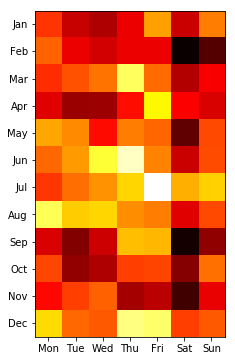

In [29]:
plt.figure(figsize=(8, 6))
plt.imshow(arr_count, cmap='hot', interpolation='nearest')
# plt.xticks(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xticks(range(0, 7), ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
plt.yticks(range(0, 12), ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
plt.show()

#### Saturday contains the most delayed flights as Sunday is the weekend

##     - Plot the distribution of flights delays and spot discovered outliers. Can you explain potential reasons for them ?

In [31]:
import seaborn as sns

/Users/apple/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


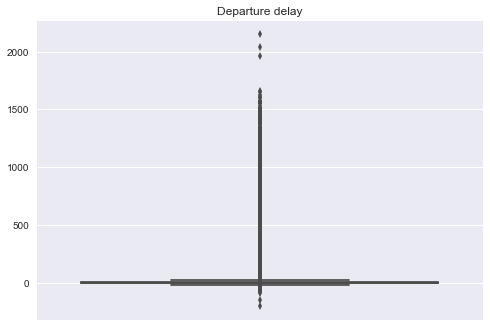

In [35]:
sns.boxplot(y=list(dataframe.DEP_DELAY))
plt.title('Departure delay')
plt.show()

/Users/apple/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


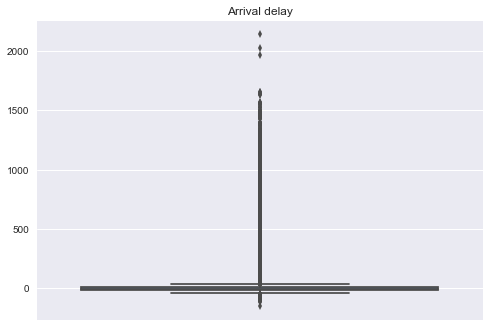

In [36]:
sns.boxplot(y=list(dataframe.ARR_DELAY))
plt.title('Arrival delay')
plt.show()

#### The data contains many outliers especially those who arrive late. Most of the values are far from the median

## - What is the best times to fly during the 24 hours of a day? 

In [30]:
delayed_flights_per_hour = dataframe[(dataframe["ARR_DELAY"] > 0) | (dataframe["DEP_DELAY"] > 0)]

In [31]:
delayed_flights_per_hour.loc[:, "DEP_HOUR"] = np.divmod(delayed_flights_per_hour.DEP_TIME, 100)[0]

/Users/apple/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/apple/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
delayed_flights_per_hour.head()

,YEAR,QUARTER,ORIGIN_CITY_NAME,ORIGIN_AIRPORT_ID,ORIGIN,MONTH,DEST_CITY_NAME,DEST_AIRPORT_ID,DEST,DAY_OF_WEEK,DAY_OF_MONTH,CANCELLATION_CODE,ARR_TIME,ARR_DELAY,DEP_TIME,DEP_DELAY,CANCELLED,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIVERTED,DEP_HOUR
1,2016,1,"Atlanta, GA",10397,ATL,1,"Grand Rapids, MI",11986,GRR,5,1,,2319.0,-2.0,2130.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,21.0
2,2016,1,"Los Angeles, CA",12892,LAX,1,"Atlanta, GA",10397,ATL,5,1,,547.0,-13.0,2256.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,22.0
3,2016,1,"Salt Lake City, UT",14869,SLC,1,"Atlanta, GA",10397,ATL,5,1,,2213.0,-16.0,1700.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,17.0
4,2016,1,"Bozeman, MT",10849,BZN,1,"Minneapolis, MN",13487,MSP,5,1,,1420.0,124.0,1012.0,72.0,0.0,72.0,52.0,0.0,0.0,0.0,0.0,10.0
5,2016,1,"Atlanta, GA",10397,ATL,1,"Nashville, TN",10693,BNA,5,1,,1402.0,83.0,1356.0,83.0,0.0,43.0,0.0,0.0,0.0,40.0,0.0,13.0


In [33]:
x = delayed_flights_per_hour.groupby(["DEP_HOUR"])["DEP_DELAY"].agg(["sum"])
x

,sum
DEP_HOUR,
0.0,1573654.0
1.0,791815.0
2.0,344264.0
3.0,134200.0
4.0,50837.0
5.0,90618.0
6.0,590039.0
7.0,1143469.0
8.0,1682182.0


In [34]:
x['sum']

DEP_HOUR
0.0     1573654.0
1.0      791815.0
2.0      344264.0
3.0      134200.0
4.0       50837.0
5.0       90618.0
6.0      590039.0
7.0     1143469.0
8.0     1682182.0
9.0     2220912.0
10.0    2657831.0
11.0    2998569.0
12.0    3229429.0
13.0    3384004.0
14.0    3623743.0
15.0    3932830.0
16.0    4089655.0
17.0    4484011.0
18.0    4928051.0
19.0    5263742.0
20.0    5292026.0
21.0    4861048.0
22.0    3971430.0
23.0    2667551.0
24.0      31756.0
Name: sum, dtype: float64

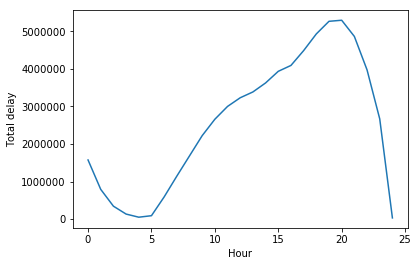

In [35]:
plt.plot(x['sum'])
plt.xlabel('Hour')
plt.ylabel('Total delay')
plt.show()

#### The bset hour to fly is the hour with the least total departure delay - about 4-5 am

## - What are the highest 20 airports suffering flight delays?

In [36]:
delayed_flights_per_airport = dataframe[(dataframe["DEP_DELAY"] > 0)]

In [37]:
delay_values = delayed_flights_per_airport.groupby(["ORIGIN_AIRPORT_ID"])["DEP_DELAY"].agg(["sum"])
delay_values

,sum
ORIGIN_AIRPORT_ID,
10135,31562.0
10136,2241.0
10140,204173.0
10141,7202.0
10146,11737.0
10154,11458.0
10155,17499.0
10157,23631.0
10158,55997.0


In [38]:
delay_values = delay_values.sort_values(by=['sum'], ascending=False)
delay_values

,sum
ORIGIN_AIRPORT_ID,
10397,4046372.0
13930,3749175.0
12892,3019426.0
11298,2662284.0
11292,2647698.0
14771,2498604.0
12889,1871867.0
11618,1843490.0
13204,1636197.0


In [39]:
hightest_20_ids = delay_values.index[:20]
hightest_20_ids

Int64Index([10397, 13930, 12892, 11298, 11292, 14771, 12889, 11618, 13204,
            12266, 14107, 12953, 12478, 10721, 11433, 13487, 11697, 11057,
            14747, 13303],
           dtype='int64', name='ORIGIN_AIRPORT_ID')

In [40]:
airport_names = pd.read_csv('L_AIRPORT_ID.csv')

In [41]:
airport_names.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [42]:
highest_20 = airport_names[airport_names.Code.isin(hightest_20_ids.values)]['Description'].values
highest_20

array(['Atlanta, GA: Hartsfield-Jackson Atlanta International',
       'Boston, MA: Logan International',
       'Charlotte, NC: Charlotte Douglas International',
       'Denver, CO: Denver International',
       'Dallas/Fort Worth, TX: Dallas/Fort Worth International',
       'Detroit, MI: Detroit Metro Wayne County',
       'Newark, NJ: Newark Liberty International',
       'Fort Lauderdale, FL: Fort Lauderdale-Hollywood International',
       'Houston, TX: George Bush Intercontinental/Houston',
       'New York, NY: John F. Kennedy International',
       'Las Vegas, NV: McCarran International',
       'Los Angeles, CA: Los Angeles International',
       'New York, NY: LaGuardia', 'Orlando, FL: Orlando International',
       'Miami, FL: Miami International',
       'Minneapolis, MN: Minneapolis-St Paul International',
       "Chicago, IL: Chicago O'Hare International",
       'Phoenix, AZ: Phoenix Sky Harbor International',
       'Seattle, WA: Seattle/Tacoma International',
       '

#### The above 20 airports are the highest suffering from departure delay 

# d- Initial Features Engineering:

In [43]:
from sklearn import tree

In [44]:
fit_data = dataframe
fit_data['delayed'] = (dataframe.ARR_DELAY > 0) | (dataframe.DEP_DELAY > 0)
fit_data["DEP_HOUR"] = np.divmod(delayed_flights_per_hour.DEP_TIME, 100)[0]

In [45]:
fit_data.head()

,YEAR,QUARTER,ORIGIN_CITY_NAME,ORIGIN_AIRPORT_ID,ORIGIN,MONTH,DEST_CITY_NAME,DEST_AIRPORT_ID,DEST,DAY_OF_WEEK,DAY_OF_MONTH,CANCELLATION_CODE,ARR_TIME,ARR_DELAY,DEP_TIME,DEP_DELAY,CANCELLED,CARRIER_DELAY,NAS_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIVERTED,delayed,DEP_HOUR
0,2016,1,"Detroit, MI",11433,DTW,1,"Los Angeles, CA",12892,LAX,5,1,,2120.0,-24.0,1935.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN
1,2016,1,"Atlanta, GA",10397,ATL,1,"Grand Rapids, MI",11986,GRR,5,1,,2319.0,-2.0,2130.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,True,21.0
2,2016,1,"Los Angeles, CA",12892,LAX,1,"Atlanta, GA",10397,ATL,5,1,,547.0,-13.0,2256.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,True,22.0
3,2016,1,"Salt Lake City, UT",14869,SLC,1,"Atlanta, GA",10397,ATL,5,1,,2213.0,-16.0,1700.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,True,17.0
4,2016,1,"Bozeman, MT",10849,BZN,1,"Minneapolis, MN",13487,MSP,5,1,,1420.0,124.0,1012.0,72.0,0.0,72.0,52.0,0.0,0.0,0.0,0.0,True,10.0


In [46]:
fit_data.fillna(0, inplace=True)

In [47]:
fit_data.loc[:, ["ORIGIN_AIRPORT_ID", 'DEST_AIRPORT_ID', "DEP_HOUR", "MONTH", "DAY_OF_WEEK"]].values

array([[  1.14330000e+04,   1.28920000e+04,   0.00000000e+00,
          1.00000000e+00,   5.00000000e+00],
       [  1.03970000e+04,   1.19860000e+04,   2.10000000e+01,
          1.00000000e+00,   5.00000000e+00],
       [  1.28920000e+04,   1.03970000e+04,   2.20000000e+01,
          1.00000000e+00,   5.00000000e+00],
       ..., 
       [  1.33420000e+04,   1.03970000e+04,   1.50000000e+01,
          1.20000000e+01,   5.00000000e+00],
       [  1.03970000e+04,   1.46350000e+04,   1.10000000e+01,
          1.20000000e+01,   5.00000000e+00],
       [  1.46350000e+04,   1.03970000e+04,   1.30000000e+01,
          1.20000000e+01,   5.00000000e+00]])

In [48]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(fit_data.loc[:, ["ORIGIN_AIRPORT_ID", 'DEST_AIRPORT_ID', "DEP_HOUR", "MONTH", "DAY_OF_WEEK"]].values, fit_data['delayed'])

In [49]:
clf.feature_importances_

array([  3.34951332e-04,   9.14462002e-04,   9.97734347e-01,
         5.14953509e-04,   5.01285869e-04])

In [50]:
features = ["ORIGIN_AIRPORT_ID", 'DEST_AIRPORT_ID', "DEP_HOUR", "MONTH", "DAY_OF_WEEK"]
importance = clf.feature_importances_
dict_importance = dict(zip(features, importance))
dict_importance

{'DAY_OF_WEEK': 0.00050128586855370755,
 'DEP_HOUR': 0.99773434728864707,
 'DEST_AIRPORT_ID': 0.00091446200153838563,
 'MONTH': 0.00051495350941776488,
 'ORIGIN_AIRPORT_ID': 0.00033495133184307271}

In [51]:
features_sorted = sorted(dict_importance, key=dict_importance.get, reverse=True)
features_sorted

['DEP_HOUR', 'DEST_AIRPORT_ID', 'MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID']